# Assignment 2 - BUSA8001 Applied Predictive Analytics
Student name: Hea Rang Heo
Student number: 48133981

---
## Exploratory Data Analysis

In [1]:
# 
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/hearangheo/Desktop/BUSA8001 Applied Predictive Analytics/Assignment2/data/data.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           2000 non-null   int64
 1   Marital Status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement Size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [3]:
df.describe()

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.60450,0.500500,40.823500,1.456500,137516.196500,0.612500,0.834000
std,0.48908,0.500125,9.455848,0.783846,46184.296588,0.674219,0.967942
min,0.00000,0.000000,20.000000,0.000000,35832.000000,0.000000,0.000000
25%,0.00000,0.000000,33.000000,1.000000,101262.750000,0.000000,0.000000
50%,1.00000,1.000000,40.000000,1.000000,133004.000000,1.000000,0.000000
75%,1.00000,1.000000,48.000000,2.000000,171232.500000,1.000000,2.000000
max,1.00000,1.000000,76.000000,3.000000,309364.000000,2.000000,2.000000


In [18]:
df['Gender'].value_counts()

Gender
1    1209
0     791
Name: count, dtype: int64

<Axes: title={'center': 'Gender Distribution'}, ylabel='count'>

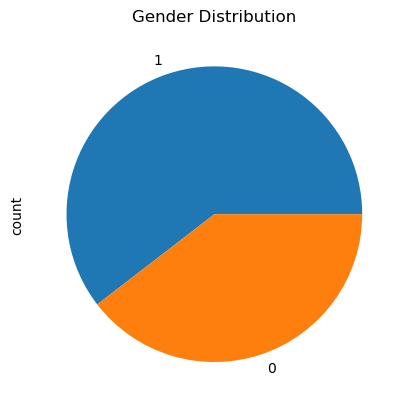

In [4]:
df['Gender'].value_counts().plot(kind='pie', title='Gender Distribution')

In [5]:
df['Marital Status'].value_counts()

Marital Status
1    1001
0     999
Name: count, dtype: int64

<Axes: title={'center': 'Education'}, ylabel='count'>

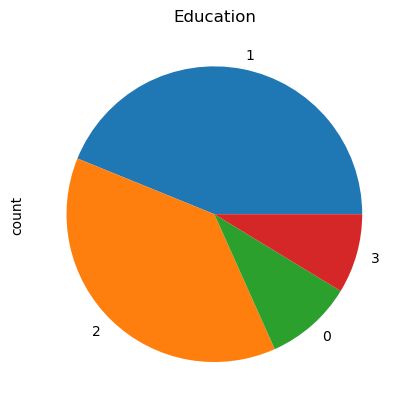

In [6]:
df['Education'].value_counts().plot(kind='pie', title='Education')

<Axes: title={'center': 'Income Distribution'}, ylabel='Frequency'>

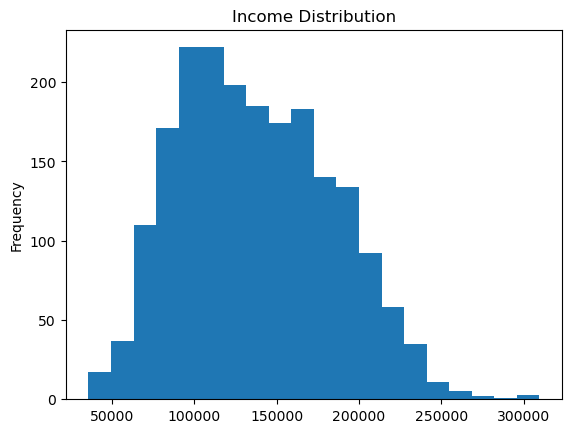

In [7]:
df['Income'].plot(kind='hist', bins=20, title='Income Distribution')

<Axes: title={'center': 'Occupation Distribution'}, xlabel='Occupation'>

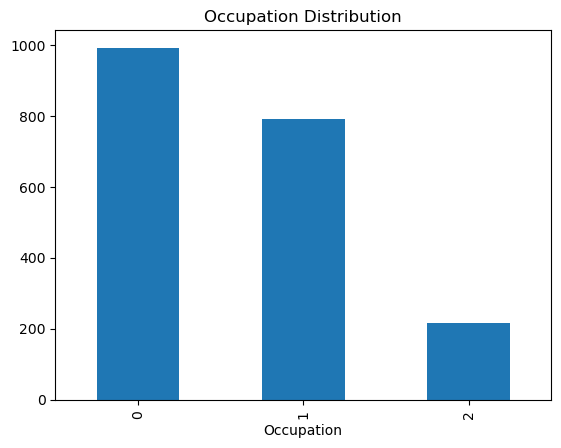

In [8]:
df['Occupation'].value_counts().plot(kind='bar', title='Occupation Distribution')


<Axes: title={'center': 'Settlement Size Distribution'}, xlabel='Settlement Size'>

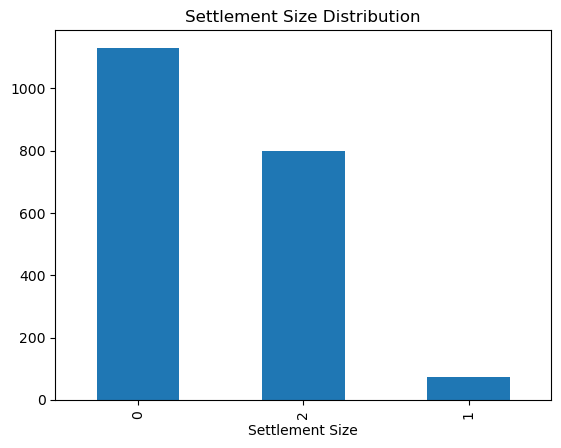

In [9]:
df['Settlement Size'].value_counts().plot(kind='bar', title='Settlement Size Distribution')


In [10]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
label_encoders = {}
for col in ['Gender', 'Marital Status', 'Education', 'Occupation', 'Settlement Size']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le

## Customer Segmentation

In [11]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.cluster import KMeans, AgglomerativeClustering
# from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples


In [12]:
# Standardize Age and Income
scaler = StandardScaler()
df[['Age_scaled', 'Income_scaled']] = scaler.fit_transform(df[['Age', 'Income']])

# Replaced unstandardized variables Age and Income to a new df called df2, to be used for clustering
df2 = df.drop(columns=['Age', 'Income', 'Age_scaled', 'Income_scaled']).copy()
df2[['Age', 'Income']] = df[['Age_scaled', 'Income_scaled']]


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2000 non-null   int64  
 1   Marital Status   2000 non-null   int64  
 2   Education        2000 non-null   int64  
 3   Occupation       2000 non-null   int64  
 4   Settlement Size  2000 non-null   int64  
 5   Age              2000 non-null   float64
 6   Income           2000 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 109.5 KB


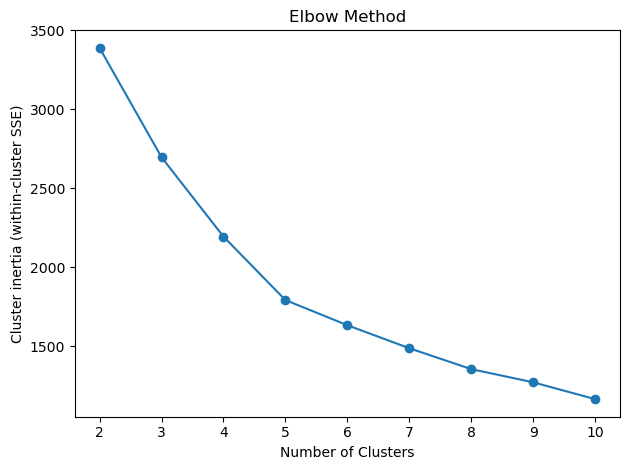

In [21]:
inertias = []
# silhouette_score = []
k_values = range(2,11)

for i in k_values:
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(df2)
    inertias.append(km.inertia_)

# plt.figure(figsize=(10, 5))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster inertia (within-cluster SSE)')
plt.xticks(k_values)
plt.tight_layout()
plt.show()

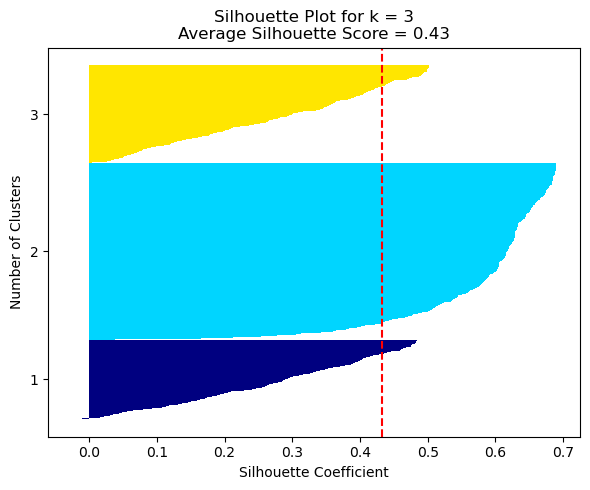

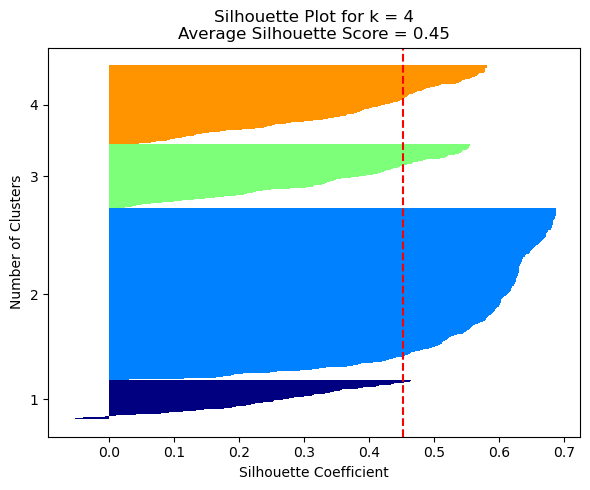

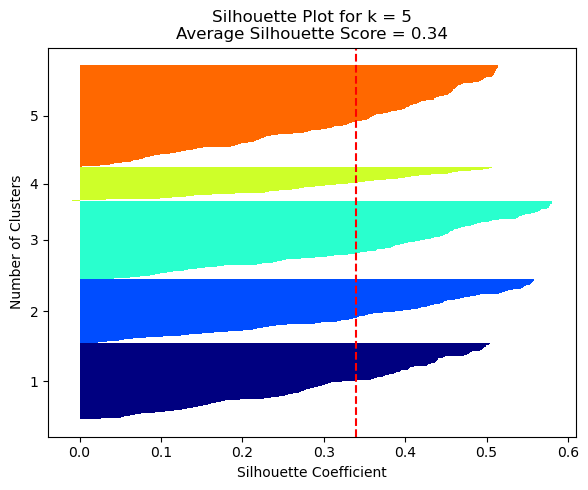

In [23]:
# Set your input data (standardized version)
X = df2.drop(columns=['kmeans_cluster', 'agg_cluster'], errors='ignore')

# Function to plot silhouette plot for a given k
def plot_silhouette_k(k, X):
    km2 = KMeans(n_clusters=k,  
                init='k-means++', 
                n_init=10, 
                max_iter=300,
                tol=1e-04,
                random_state=0)

    y_km = km2.fit_predict(X)
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]

    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    silhouette_avg = np.mean(silhouette_vals)

    # ------- Plotting silhouette values -------
    y_ax_lower, yticks = 0, []
    plt.figure(figsize=(6, 5))

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper = y_ax_lower + len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                 c_silhouette_vals,
                 height=1.0,
                 edgecolor='none',
                 color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower = y_ax_upper

    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Number of Clusters')
    plt.xlabel('Silhouette Coefficient')
    plt.title(f'Silhouette Plot for k = {k}\nAverage Silhouette Score = {silhouette_avg:.2f}')
    plt.tight_layout()
    plt.show()

# Generate silhouette plots for k = 3, 4, and 5
for k in [3, 4, 5]:
    plot_silhouette_k(k, X)


In [27]:
#K-means++ Clustering (k=3)
clustering_X = df2.copy()

km_plus = KMeans(
    n_clusters=3, 
    init='k-means++',  
    n_init=10,
    max_iter=300,
    # tol=1e-04,
    random_state=0)

y_km_plus= km_plus.fit_predict(clustering_X)

# Add labels to df for summary
clustering_X['kmeans_cluster'] = y_km_plus

# Cluster centers
kmeans_centers = pd.DataFrame(km_plus.cluster_centers_, columns=df2.columns)
print("K-means++ Cluster Centers:")
print(kmeans_centers.round(3).to_string())

# Cluster counts
print("\nNumber of customers per K-means++ cluster:")
print(clustering_X['kmeans_cluster'].value_counts().sort_index())


K-means++ Cluster Centers:
   Gender  Marital Status  Education  Occupation  Settlement Size    Age  Income
0   0.851           0.984      2.085       1.198            1.599  1.411   1.412
1   0.352           0.006      0.809       0.012            0.063 -0.747  -0.747
2   0.859           0.998      2.112       1.218            1.601  0.200   0.200

Number of customers per K-means++ cluster:
kmeans_cluster
0    449
1    997
2    554
Name: count, dtype: int64


In [25]:
# Agglomerative Clustering (k=3)
ac = AgglomerativeClustering(
    n_clusters=3, 
    metric='euclidean', 
    linkage='complete')
ac_labels = ac.fit_predict(clustering_X.drop(columns='kmeans_cluster'))

clustering_X['agg_cluster'] = ac_labels

# Cluster summary (mean values for interpretability)
feature_cols = ['Gender', 'Marital Status', 'Education', 'Occupation', 'Settlement Size', 'Age', 'Income']
ac_summary = clustering_X.groupby('agg_cluster')[feature_cols].mean().round(3).to_string()
print("\nAgglomerative Cluster Means:")
print(ac_summary)

# Cluster counts
print("\nNumber of customers per Agglomerative cluster:")
print(clustering_X['agg_cluster'].value_counts().sort_index())


Agglomerative Cluster Means:
             Gender  Marital Status  Education  Occupation  Settlement Size    Age  Income
agg_cluster                                                                               
0             0.767           0.850      1.911       1.033            1.392  0.586   0.586
1             0.368           0.006      0.805       0.013            0.069 -0.920  -0.920
2             0.942           1.000      2.231       1.269            1.231  2.289   2.289

Number of customers per Agglomerative cluster:
agg_cluster
0    1111
1     837
2      52
Name: count, dtype: int64
